### Exam Paper Analysis

### Introduction
The dataset represents midterm exam scores for multiple individuals across various questions or modules. Each row corresponds to a unique individual, and the columns represent the scores for specific questions or sections within the exam. The data includes a "Total" column, which summarizes the total marks obtained by the individual, while the other columns (like Q1aM4, Q1bM6, etc.) represent scores for specific questions, with the labels indicating the question number and maximum marks. Missing values (represented as NaN) indicate that the participant may have skipped the question or the data was not recorded. The structured format of the dataset allows for easy analysis of individual and group performance, helping identify patterns and trends in scoring.
### Dataset used: MIDMARKS.xlsx

In [3]:
import pandas as pd
df = pd.read_excel("MIDMARKS.xlsx")
df

,S.NO,SECTION,DV,M-II,PP,BEEE,FL,FIMS
0,1.0,ALPHA,12,0,17,9,19,15
1,2.0,ALPHA,19,12,16,16,18,3
2,3.0,ALPHA,18,14,18,18,18,16
3,4.0,ALPHA,15,9,19,17,19,15
4,5.0,ALPHA,18,17,19,19,20,18
...,...,...,...,...,...,...,...,...
711,NaN,ZETA,19,8,8,19,17,18
712,NaN,ZETA,12,1,7,10,20,8
713,NaN,ZETA,17,6,14,14,17,18
714,NaN,ZETA,12,1,6,7,15,12


This is the midmarks dataset of students

In [5]:
df.shape

(716, 8)

This is the shape of the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   S.NO     598 non-null    float64
 1   SECTION  690 non-null    object 
 2   DV       716 non-null    object 
 3   M-II     716 non-null    object 
 4   PP       716 non-null    object 
 5   BEEE     716 non-null    object 
 6   FL       715 non-null    object 
 7   FIMS     716 non-null    object 
dtypes: float64(1), object(7)
memory usage: 44.9+ KB


This is the info of the midmarks dataset

In [9]:
df.head()

,S.NO,SECTION,DV,M-II,PP,BEEE,FL,FIMS
0,1.0,ALPHA,12,0,17,9,19,15
1,2.0,ALPHA,19,12,16,16,18,3
2,3.0,ALPHA,18,14,18,18,18,16
3,4.0,ALPHA,15,9,19,17,19,15
4,5.0,ALPHA,18,17,19,19,20,18


Generally, df.head() displays the first few rows of a DataFrame, giving a quick overview of the data 
structure, including column names, data types, and initial values.

In [11]:
df.tail()

,S.NO,SECTION,DV,M-II,PP,BEEE,FL,FIMS
711,NaN,ZETA,19,8,8,19,17,18
712,NaN,ZETA,12,1,7,10,20,8
713,NaN,ZETA,17,6,14,14,17,18
714,NaN,ZETA,12,1,6,7,15,12
715,NaN,ZETA,19,14,17,16,20,19


The df.tail() function shows the last few rows of the DataFrame. It provides the structure of the dataset, 
including column names, data types, and the final entries.

In [13]:
subject_columns = ['DV', 'M-II', 'PP', 'BEEE', 'FL', 'FIMS']
df[subject_columns] = df[subject_columns].apply(pd.to_numeric, errors='coerce')
descriptive_stats = df[subject_columns].describe()
print("Descriptive Statistics for Subject Scores:")
print(descriptive_stats)

Descriptive Statistics for Subject Scores:
               DV        M-II          PP        BEEE          FL        FIMS
count  705.000000  704.000000  701.000000  697.000000  702.000000  694.000000
mean    15.018440   10.119318   13.042796   13.649928   15.854701   14.492795
std      4.211517    6.524925    5.567600    5.422731    3.938757    4.052588
min      1.000000    0.000000    0.000000    0.000000    1.000000    0.000000
25%     12.000000    4.000000    9.000000   10.000000   13.000000   12.000000
50%     16.000000   10.000000   14.000000   15.000000   16.000000   15.000000
75%     18.000000   16.000000   18.000000   18.000000   20.000000   18.000000
max     20.000000   20.000000   20.000000   20.000000   20.000000   20.000000


This output summarizes six columns with their count, average (mean), spread (std), and range (min to max). 
It shows how data is distributed, with the mean, minimum and maximum values across columns.

In [15]:
df=df.fillna(0)

In [16]:
df.isnull().sum()

S.NO       0
SECTION    0
DV         0
M-II       0
PP         0
BEEE       0
FL         0
FIMS       0
dtype: int64

The df.isnull().sum() function calculates the number of missing (null) values in each column of the DataFrame.

In [18]:
import numpy as np
df['S.NO'].astype(np.int64)

0      1
1      2
2      3
3      4
4      5
      ..
711    0
712    0
713    0
714    0
715    0
Name: S.NO, Length: 716, dtype: int64

This is used to convert the data type of the column S.NO in the DataFrame(df) to a 64-bit integer format (int64).

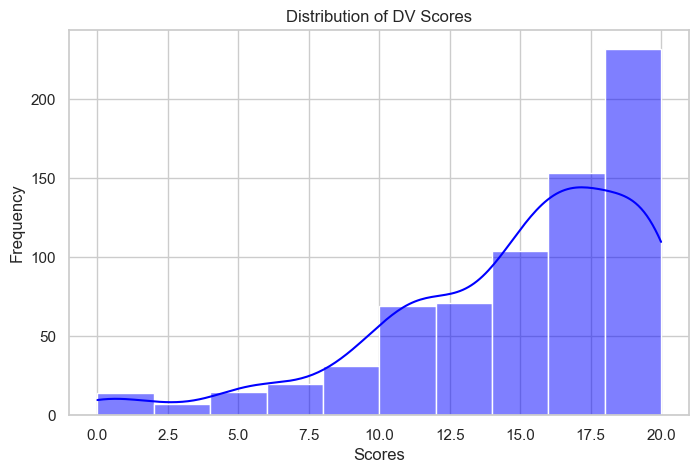

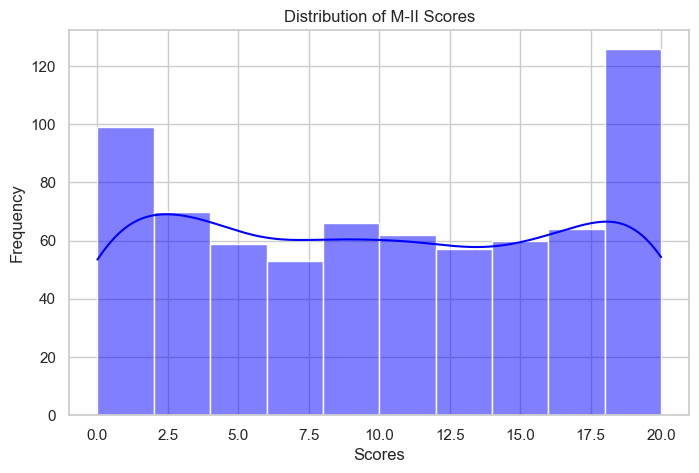

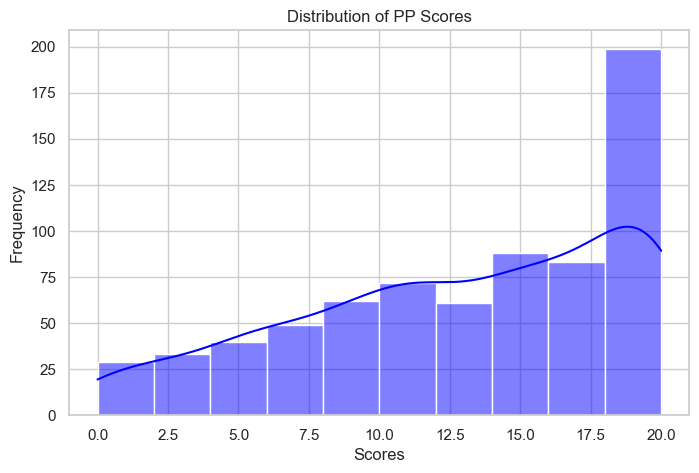

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
subject_columns = ['DV', 'M-II', 'PP']
sns.set(style="whitegrid")
for subject in subject_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[subject], bins=10, kde=True, color='blue')
    plt.title(f'Distribution of {subject} Scores')
    plt.xlabel('Scores')
    plt.ylabel('Frequency')
    plt.show()

This code generates histograms with curves for the subjects 'DV', 'M-II', and 'PP' to visualize
the distribution of student scores. It uses 10 bins and a blue color to display the frequency
of scores for each subject with smooth distribution curves.

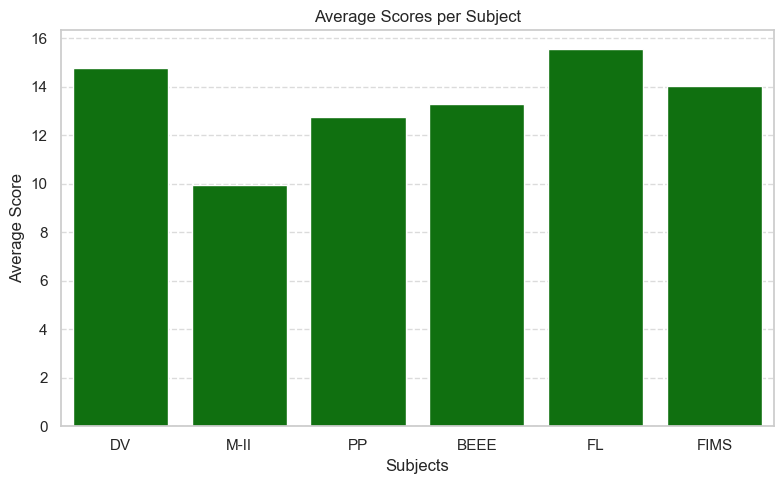

In [22]:
numeric_columns = ["DV", "M-II", "PP", "BEEE", "FL", "FIMS"]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
average_scores = df[numeric_columns].mean().reset_index()
average_scores.columns = ['Subject', 'Average Score']
plt.figure(figsize=(8, 5))
sns.barplot(x='Subject', y='Average Score', data=average_scores, color="green")  # Use `color` for a single color
plt.title("Average Scores per Subject")
plt.xlabel("Subjects")
plt.ylabel("Average Score")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The bar chart will display six bars, one for each subject (DV, M-II, PP, BEEE, FL, and FIMS), with heights 
corresponding to their respective average scores.It highlights the differences in average scores, helping 
identify subjects where performance is stronger or weaker. This code uses Seaborn's sns.barplot() to create
a clean and informative bar chart showcasing the average scores for different subjects.

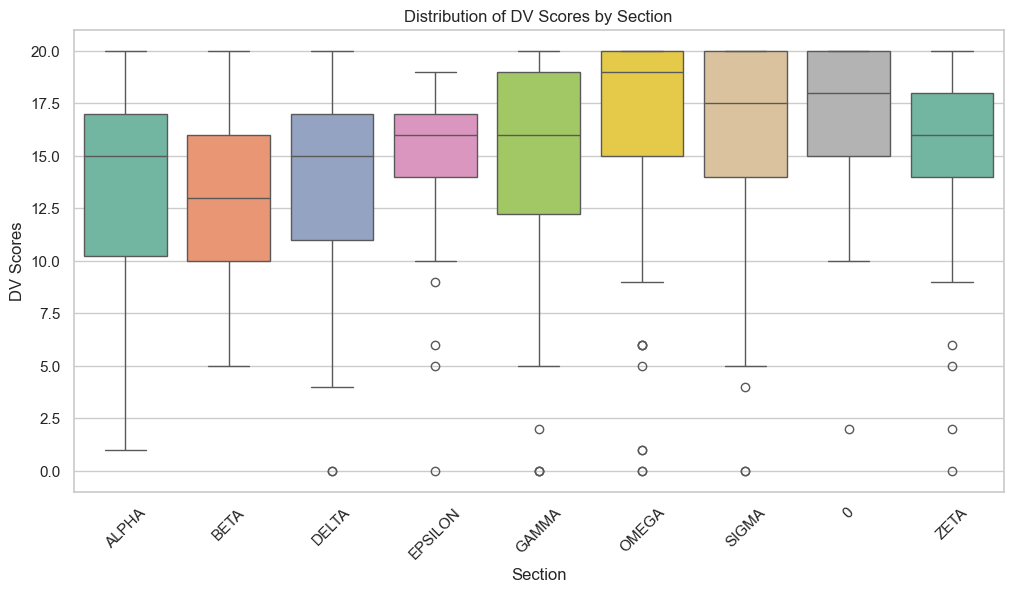

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="SECTION", y="DV", data=df, hue="SECTION", palette='Set2', dodge=False)
plt.legend([], [], frameon=False)  
plt.title('Distribution of DV Scores by Section')
plt.xlabel('Section')
plt.ylabel('DV Scores')
plt.xticks(rotation=45)
plt.show()

This code creates a boxplot to visualize the distribution of 'DV' scores across different sections. 
It uses the Set2 color palette and displays the distribution of scores for each section with the
boxplot and rotating the x-axis labels for better readability.

In [26]:
df=df.fillna(0)
df['S.NO'] = df['S.NO'].astype(int)
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce').astype('Int64')

In [27]:
df["Total"] = df[numeric_columns].sum(axis=1).astype('Int64')
df.head()

,S.NO,SECTION,DV,M-II,PP,BEEE,FL,FIMS,Total
0,1,ALPHA,12,0,17,9,19,15,72
1,2,ALPHA,19,12,16,16,18,3,84
2,3,ALPHA,18,14,18,18,18,16,102
3,4,ALPHA,15,9,19,17,19,15,94
4,5,ALPHA,18,17,19,19,20,18,111


This code adds a new column Total to the DataFrame , representing the total score for 
each row across the specified numeric columns.

In [29]:
top_performers = df.nlargest(10, 'Total')
print("Top Performers:")
print(top_performers)

Top Performers:
     S.NO SECTION  DV  M-II  PP  BEEE  FL  FIMS  Total
505   506   OMEGA  20    20  20    20  20    20    120
507   508   OMEGA  20    20  20    20  20    20    120
573   577   SIGMA  20    20  20    20  20    20    120
595   599   SIGMA  20    20  20    20  20    20    120
251   252   DELTA  20    20  20    19  20    20    119
453   454   OMEGA  20    20  20    20  20    19    119
533   534   OMEGA  20    19  20    20  20    20    119
611     0       0  20    20  19    20  20    20    119
616     0       0  20    20  20    20  20    19    119
23     24   ALPHA  20    20  20    20  20    18    118


Identify and display the top performers based on total scores.

In [31]:
low_performers = df.nsmallest(10, 'Total')
print("Lowest Performers:")
print(low_performers)

Lowest Performers:
     S.NO  SECTION  DV  M-II  PP  BEEE  FL  FIMS  Total
244   245    DELTA   0     0   0     0   0     0      0
336   337  EPSILON   0     0   0     0   0     0      0
402   403    GAMMA   0     0   0     0   0     0      0
414   415    GAMMA   0     0   0     0   0     0      0
495   496    OMEGA   0     0   0     0   0     0      0
551   552    SIGMA   0     0   0     0   0     0      0
556   557    SIGMA   0     0   0     0   0     0      0
648     0     ZETA   0     0   0     0   0     0      0
82     83    ALPHA   2     0   2     0   0     0      4
671     0     ZETA   2     0   0     0   2     1      5


Identify and display the lowest-performing students based on total

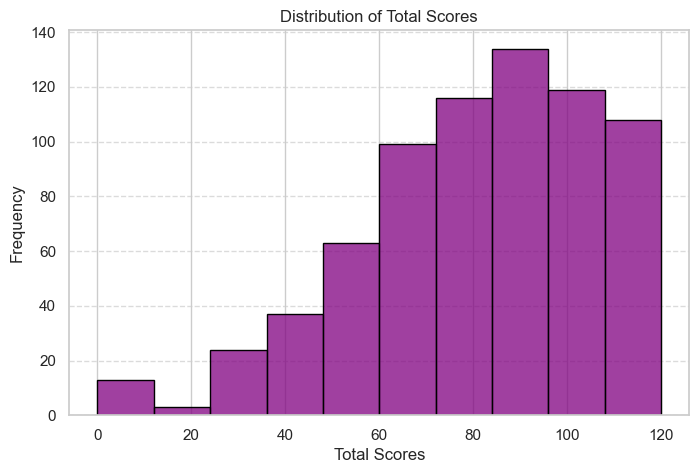

In [33]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Total', bins=10, color='purple', edgecolor='black')
plt.title("Distribution of Total Scores")
plt.xlabel("Total Scores")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

This histogram will provide a visual representation of the frequency distribution of total scores
in the dataset.

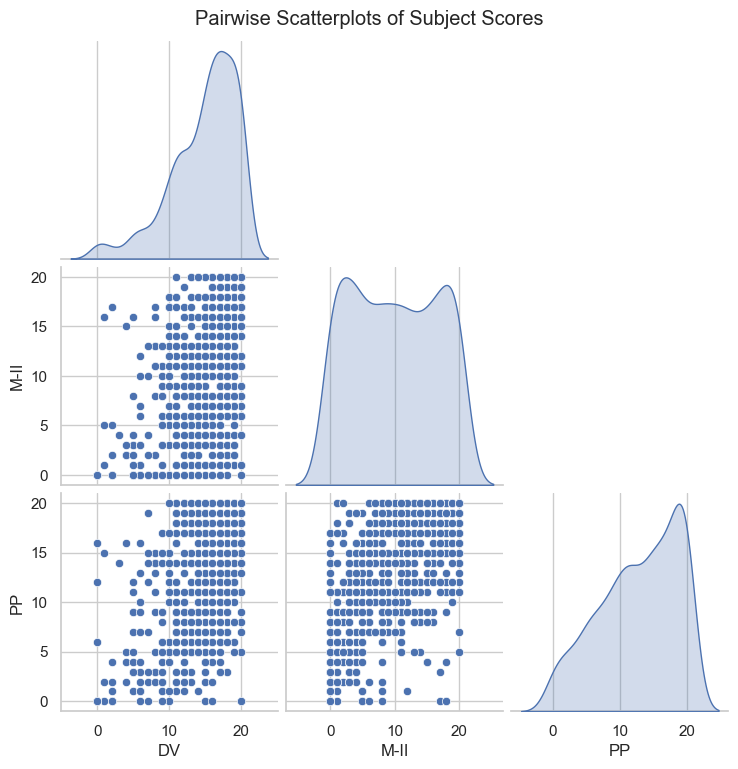

In [35]:
sns.pairplot(df[subject_columns], diag_kind='kde', corner=True)
plt.suptitle('Pairwise Scatterplots of Subject Scores', y=1.02)
plt.show()

This code generates a pairplot to visualize pairwise relationships between the scores of the subjects
listed in subject_columns. It uses KDE plots on the diagonal for distribution and scatter plots in the
lower triangle.The plot is titled "Pairwise Scatterplots of Subject Scores".

In [37]:
df["Grade"] = None  
df.loc[df["Total"] > 110, "Grade"] = "First"
df.loc[(df["Total"] <= 110) & (df["Total"] > 80), "Grade"] = "Second"
df.loc[(df["Total"] <= 80) & (df["Total"] > 60), "Grade"] = "Third"
df.loc[(df["Total"] <= 60) & (df["Total"] >= 30), "Grade"] = "Pass"
df.loc[(df["Total"] < 30) & (df["Total"] >= 0), "Grade"] = "Fail"
df

,S.NO,SECTION,DV,M-II,PP,BEEE,FL,FIMS,Total,Grade
0,1,ALPHA,12,0,17,9,19,15,72,Third
1,2,ALPHA,19,12,16,16,18,3,84,Second
2,3,ALPHA,18,14,18,18,18,16,102,Second
3,4,ALPHA,15,9,19,17,19,15,94,Second
4,5,ALPHA,18,17,19,19,20,18,111,First
...,...,...,...,...,...,...,...,...,...,...
711,0,ZETA,19,8,8,19,17,18,89,Second
712,0,ZETA,12,1,7,10,20,8,58,Pass
713,0,ZETA,17,6,14,14,17,18,86,Second
714,0,ZETA,12,1,6,7,15,12,53,Pass


This code modifies a DataFrame by adding a new column, Grade based on conditions applied 
to another column Total. This logic creates a grading system based on ranges of scores
in the Total column.

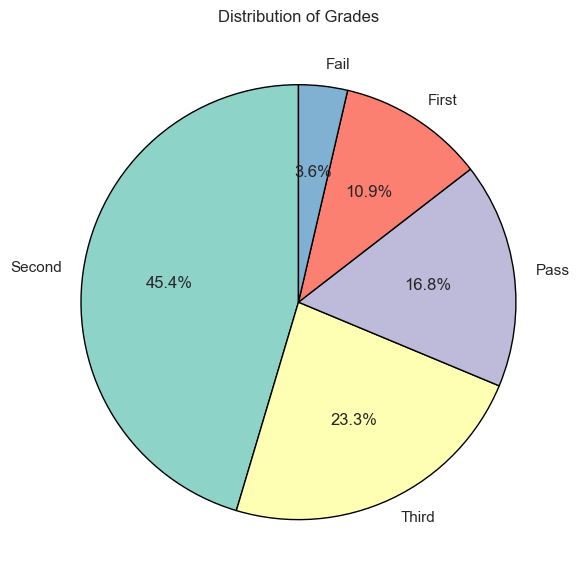

In [39]:
grade_counts = df['Grade'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(
    grade_counts, 
    labels=grade_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=sns.color_palette("Set3", len(grade_counts)),
    wedgeprops={'edgecolor': 'black'}  
)
plt.title('Distribution of Grades')
plt.tight_layout()
plt.show()

This pie chart shows the proportion of students in each grade category: Each wedge represents
a grade category ("First," "Second," etc.). The size of each wedge corresponds to the 
percentage of students in that grade.

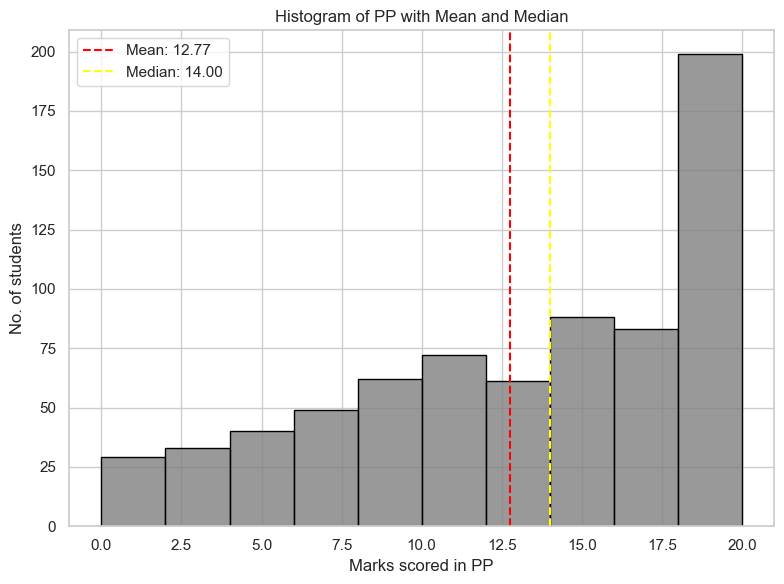

In [41]:
mean_PP = df['PP'].mean()
median_PP = df['PP'].median()
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='PP', bins=10, color='grey', edgecolor='black', alpha=0.8)
plt.axvline(mean_PP, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_PP:.2f}')
plt.axvline(median_PP, color='yellow', linestyle='dashed', linewidth=1.5, label=f'Median: {median_PP:.2f}')
plt.xlabel("Marks scored in PP")
plt.ylabel("No. of students")
plt.title("Histogram of PP with Mean and Median")
plt.legend()
plt.tight_layout()
plt.show()

The red dashed line indicates the mean, while the yellow dashed line represents the median. If the 
mean is far from the median, it suggests the presence of skewness in the data.

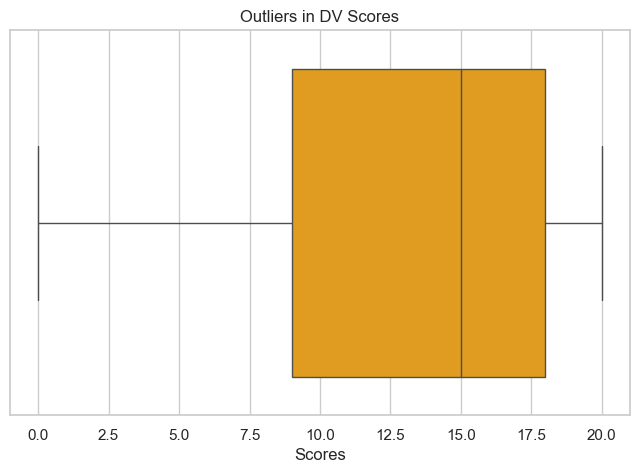

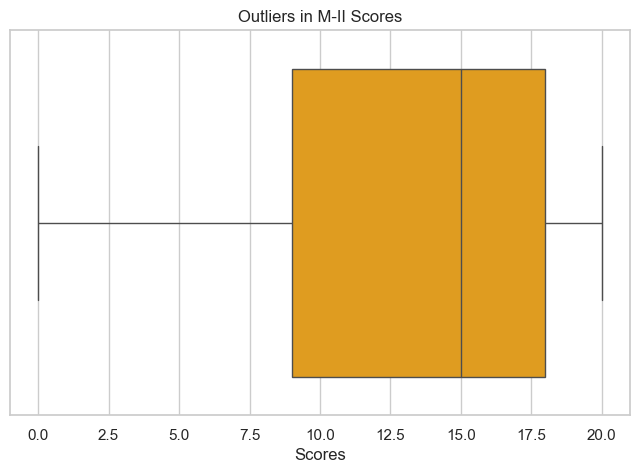

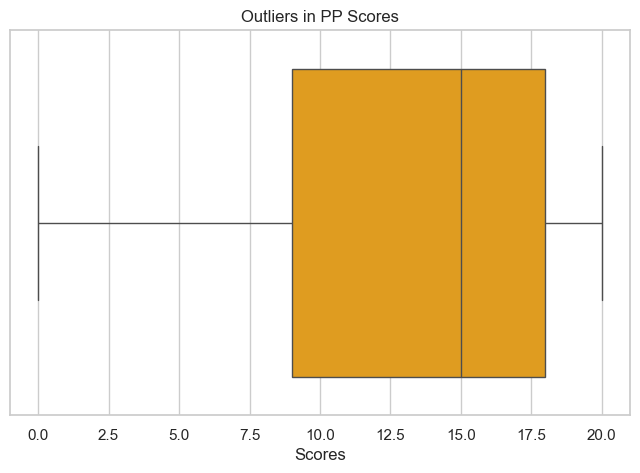

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
for subject in subject_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df['BEEE'], color='orange')
    plt.title(f'Outliers in {subject} Scores')
    plt.xlabel('Scores')
    plt.show()

This code generates a boxplot for each subject in subject_columns to visualize the distribution 
of scores and identify potential outliers. The boxplot for each subject is displayed in an orange 
color, showing the range of scores, the median, and any outliers for each subject.

C:\Users\bhava\AppData\Local\Temp\ipykernel_17976\2119746933.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


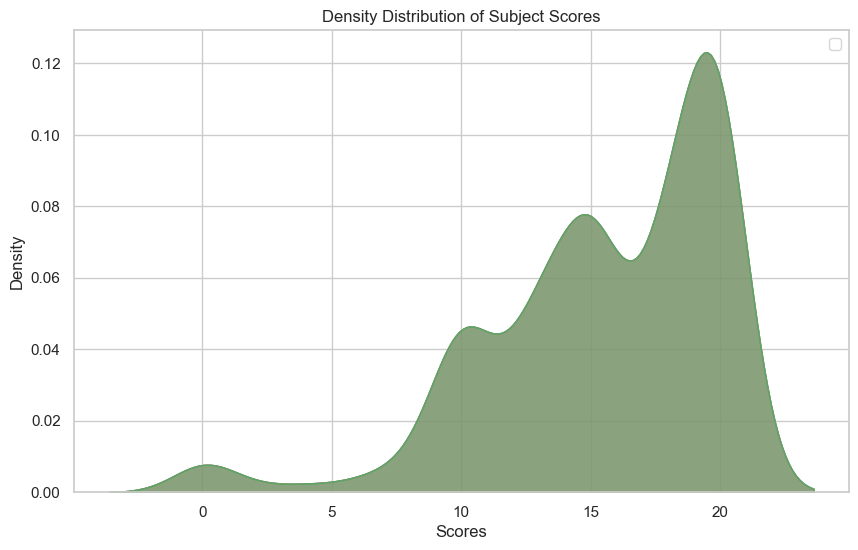

In [45]:
plt.figure(figsize=(10, 6))
for subject in subject_columns:
    sns.kdeplot(df['FL'], fill=True, alpha=0.5)
plt.title('Density Distribution of Subject Scores')
plt.xlabel('Scores')
plt.ylabel('Density')
plt.legend()
plt.show()

This code generates Kernel Density Estimation (KDE) plots to visualize the distribution of scores 
for each subject in subject_columns. The plot shows the density distribution of scores for each subject, 
allowing comparison of their distributions on the same scale.

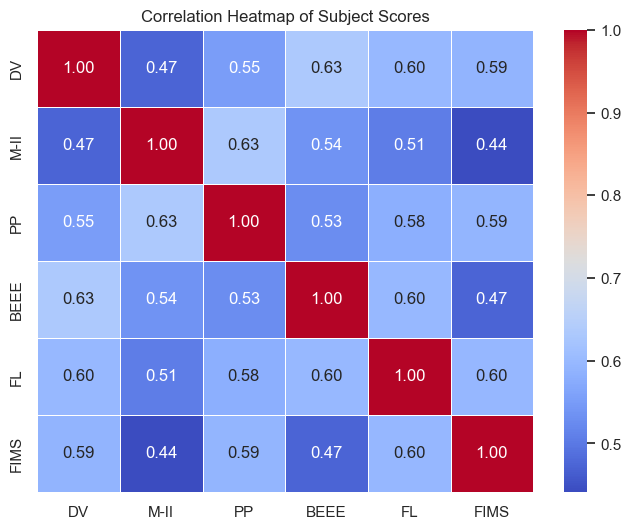

In [47]:
subject_columns = ['DV', 'M-II', 'PP', 'BEEE', 'FL', 'FIMS']
correlation_matrix = df[subject_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Subject Scores')
plt.show()

Positive correlations (closer to +1) will appear in shades of red, while negative correlations 
(closer to -1) will appear in shades of blue.The diagonal elements will always be 1 (self correlation)
this visualization to identify strongly correlated variables, which may influence analysis
or modeling decision

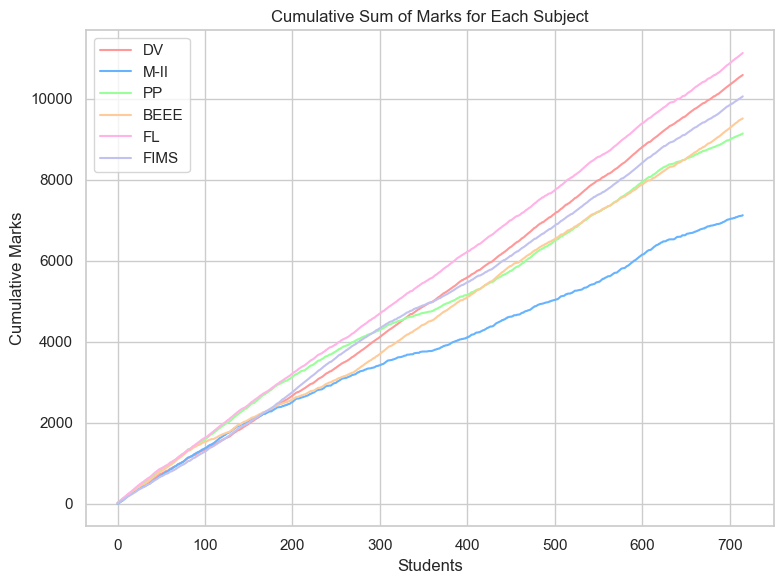

In [49]:
cumulative_sum = df[['DV', 'M-II', 'PP', 'BEEE', 'FL', 'FIMS']].cumsum()
plt.figure(figsize=(8, 6))
for idx, column in enumerate(cumulative_sum.columns):
    sns.lineplot(data=cumulative_sum[column], label=column, color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ffb3e6', '#c2c2f0'][idx])
plt.title('Cumulative Sum of Marks for Each Subject')
plt.xlabel('Students')
plt.ylabel('Cumulative Marks')
plt.grid(True)
plt.tight_layout()
plt.show()

The line plot displaying the cumulative sum of marks for each subject reveals how the total marks 
accumulate across students for each of the six questions. Each line represents one subject, with
the x-axis representing the students and the y-axis showing the cumulative marks

In [51]:
df['Result'] = df['Total'].apply(lambda x: 'pass' if x>=30 else 'Fail')
result_count=df['Result'].value_counts()
print("Pass and Fail Count:")
print(result_count)

Pass and Fail Count:
Result
pass    690
Fail     26
Name: count, dtype: int64


The result count for the Pass and Fail categories provides a breakdown of how many students passed or 
failed based on their total marks.

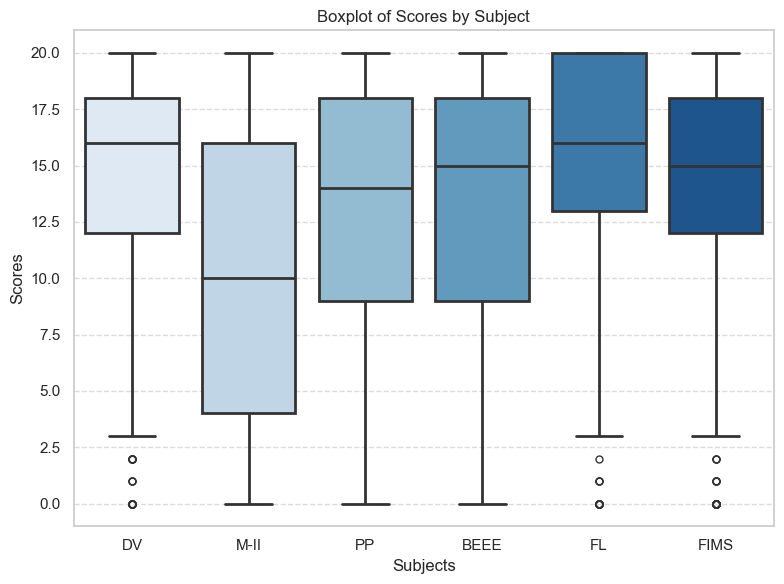

In [53]:
subjects = ["DV", "M-II", "PP", "BEEE", "FL", "FIMS"]
df[subjects] = df[subjects].apply(pd.to_numeric, errors='coerce')
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df[subjects],
    palette='Blues', 
    linewidth=2,
    fliersize=5  
)
plt.title("Boxplot of Scores by Subject")
plt.xlabel("Subjects")
plt.ylabel("Scores")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

This code creates a boxplot to visualize the distribution of scores across six subjects (DV, M-II, PP, BEEE, 
FL, and FIMS) from a DataFrame (df).The red line represents the median. This chart shows quick comparison 
of the spread of scores across subjects.

In [55]:
average_scores = {s: df[s].mean() for s in subjects}
highest_avg_subject = max(average_scores, key=average_scores.get)
print(f"Question with the highest average score: {highest_avg_subject}")

Question with the highest average score: FL


This code determines which subject has the highest average score among the six subjects 
(DV, M-II, PP, BEEE, FL, and FIMS) in the DataFrame df. It calculates the mean scores for
each subject, finds the subject with the highest average.

In [57]:
df['Percentage'] = (df['Total'] / df['Total'].max()) * 100
print(df[['Total', 'Percentage']])

     Total  Percentage
0       72        60.0
1       84        70.0
2      102        85.0
3       94   78.333333
4      111        92.5
..     ...         ...
711     89   74.166667
712     58   48.333333
713     86   71.666667
714     53   44.166667
715    105        87.5

[716 rows x 2 columns]


This calculates the percentage of each student's total score relative to the maximum total score
in the dataset and adds it as a new column called Percentage.

In [59]:
equal_scores = df[df['DV'] == df['PP']]
print("Students with equal scores in DV and PP:")
print(equal_scores)

Students with equal scores in DV and PP:
     S.NO SECTION  DV  M-II  PP  BEEE  FL  FIMS  Total   Grade Result  \
2       3   ALPHA  18    14  18    18  18    16    102  Second   pass   
11     12   ALPHA  20    20  20    20  19    16    115   First   pass   
23     24   ALPHA  20    20  20    20  20    18    118   First   pass   
30     31   ALPHA  11    12  11     3  13     6     56    Pass   pass   
39     40   ALPHA  20    17  20    19  20    18    114   First   pass   
..    ...     ...  ..   ...  ..   ...  ..   ...    ...     ...    ...   
648     0    ZETA   0     0   0     0   0     0      0    Fail   Fail   
662     0    ZETA  15    12  15    14  17     9     82  Second   pass   
666     0    ZETA  17    19  17    18  20    18    109  Second   pass   
676     0    ZETA   9     5   9    13  14    12     62   Third   pass   
693     0    ZETA  15     8  15    17  20    19     94  Second   pass   

     Percentage  
2          85.0  
11    95.833333  
23    98.333333  
30    46.6

This code filters the students who have equal scores in two subjects: DV and PP. 
It then prints out the details of these students.

In [61]:
std_devs = {s: df[s].std() for s in subjects}
print("Standard deviation for each subject:")
print(std_devs)

Standard deviation for each subject:
{'DV': 4.569545254964482, 'M-II': 6.59923601682664, 'PP': 5.817381269518235, 'BEEE': 5.783111636550412, 'FL': 4.476132482775702, 'FIMS': 4.7098149971625185}


This calculates the standard deviation for each subject listed in the subjects list and 
prints the result.Standard deviation measures the amount of variation or dispersion of
scores within each subject.

In [63]:
def performance_category(total):
    if total >= 110:
        return "Excellent"
    elif total >= 80:
        return "Good"
    elif total >= 50:
        return "Average"
    else:
        return "Poor"
df['Performance'] = df['Total'].apply(performance_category)
print(df[['Total', 'Performance']])

     Total Performance
0       72     Average
1       84        Good
2      102        Good
3       94        Good
4      111   Excellent
..     ...         ...
711     89        Good
712     58     Average
713     86        Good
714     53     Average
715    105        Good

[716 rows x 2 columns]


This code defines a function that categorizes a student's performance based on their total 
score and adds a new column Performance to the df to store the corresponding performance 
category for each student.

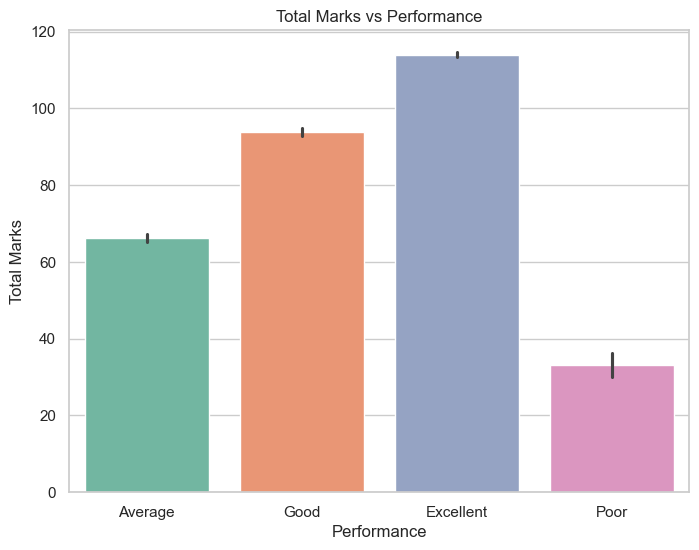

In [65]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Performance', y='Total', data=df, hue='Performance', palette='Set2')
plt.title('Total Marks vs Performance')
plt.xlabel('Performance')
plt.ylabel('Total Marks')
plt.show()

This bar chart visualizes the relationship between performance levels and total marks: Each bar
represents the average total marks scored by students in a specific performance category. The height
of the bar indicates the total marks for each category.

In [67]:
top_students = df.sort_values(by='Total', ascending=False).head(5)
print("Top 5 students based on total marks:")
print(top_students)

Top 5 students based on total marks:
     S.NO SECTION  DV  M-II  PP  BEEE  FL  FIMS  Total  Grade Result  \
507   508   OMEGA  20    20  20    20  20    20    120  First   pass   
505   506   OMEGA  20    20  20    20  20    20    120  First   pass   
573   577   SIGMA  20    20  20    20  20    20    120  First   pass   
595   599   SIGMA  20    20  20    20  20    20    120  First   pass   
616     0       0  20    20  20    20  20    19    119  First   pass   

     Percentage Performance  
507       100.0   Excellent  
505       100.0   Excellent  
573       100.0   Excellent  
595       100.0   Excellent  
616   99.166667   Excellent  


This finds the top 5 students based on their Total marks and prints the details of these students.
The students are sorted in descending order of their total marks to identify the highest achievers.

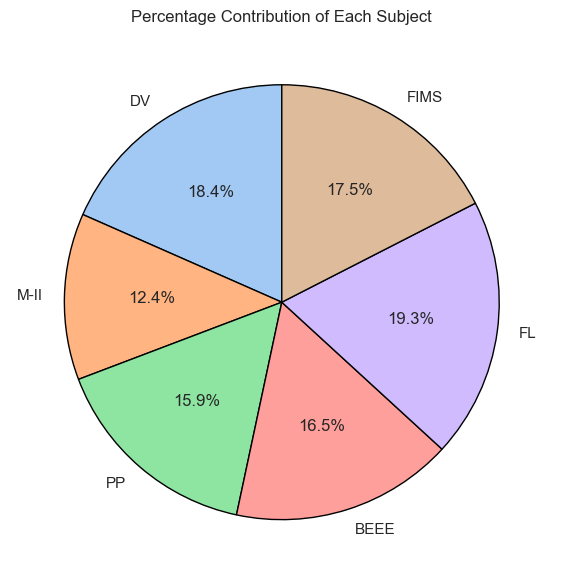

In [69]:
total_marks_per_subject = [df[s].sum() for s in subjects]
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
plt.pie(
    total_marks_per_subject, 
    labels=subjects, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=sns.color_palette("pastel", len(subjects)),  
    wedgeprops={'edgecolor': 'black'} 
)
plt.title('Percentage Contribution of Each Subject')
plt.tight_layout()
plt.show()

This generates a pie chart to display the percentage contribution of each subject to the total 
marks across all students. It uses the sum of the scores for each subject and visualizes their
relative contributions in a circular chart.

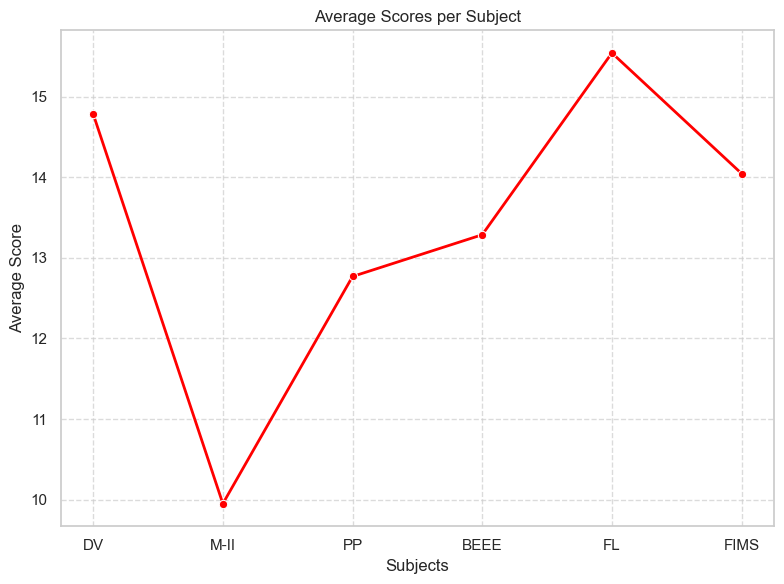

In [71]:
avg_scores = [df[s].mean() for s in subjects]
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.lineplot(x=subjects, y=avg_scores, marker='o', color='red', linewidth=2)
plt.title('Average Scores per Subject')
plt.xlabel('Subjects')
plt.ylabel('Average Score')
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

This generates a line plot to display the average scores for each subject. The plot visualizes the 
average scores across subjects, helping identify how students performed on average in each subject.

In [73]:
subject_columns = ["DV", "M-II", "PP", "BEEE", "FL", "FIMS"]
df[subject_columns] = df[subject_columns].apply(pd.to_numeric, errors="coerce")
df["Bc"] = 0 
for i, row in df.iterrows():
    bc = 0
    if row["DV"] < 10:
        bc += 1
    if row["M-II"] < 10:
        bc += 1
    if row["PP"] < 10:
        bc += 1
    if row["BEEE"] < 10:
        bc += 1
    if row["FL"] < 10:
        bc += 1
    if row["FIMS"] < 10:
        bc += 1
    df.at[i, "Bc"] = bc
df.head()

,S.NO,SECTION,DV,M-II,PP,BEEE,FL,FIMS,Total,Grade,Result,Percentage,Performance,Bc
0,1,ALPHA,12,0,17,9,19,15,72,Third,pass,60.0,Average,2
1,2,ALPHA,19,12,16,16,18,3,84,Second,pass,70.0,Good,1
2,3,ALPHA,18,14,18,18,18,16,102,Second,pass,85.0,Good,0
3,4,ALPHA,15,9,19,17,19,15,94,Second,pass,78.333333,Good,1
4,5,ALPHA,18,17,19,19,20,18,111,First,pass,92.5,Excellent,0


The goal of this code is to determine the number of subjects in which each student scored below 10. 
This can be useful for analysis, such as identifying students who are struggling or tracking subject-wise
performance.

In [75]:
backlog_students_count = (df["Bc"] > 0).sum()
print(f"Number of students with at least one backlog: {backlog_students_count}")

Number of students with at least one backlog: 443


It displays the number of students with at least one backlog

In [77]:
students_with_backlogs = df[df["Bc"] > 0].groupby("SECTION")["Bc"].count().reset_index()
students_with_backlogs.columns = ["Section", "Students_with_Backlogs"]
students_with_backlogs = students_with_backlogs[students_with_backlogs["Section"] != 0]
print(students_with_backlogs)

   Section  Students_with_Backlogs
1    ALPHA                      39
2     BETA                      54
3    DELTA                      58
4  EPSILON                      67
5    GAMMA                      57
6    OMEGA                      62
7    SIGMA                      25
8     ZETA                      69


This code identifies how many students in each section have backlogs. It's useful for section-wise 
performance analysis.

In [79]:
section_with_max_backlogs = students_with_backlogs.loc[students_with_backlogs["Students_with_Backlogs"].idxmax()]
print(f"Section with the most students having backlogs:")
print(f"Section: {section_with_max_backlogs['Section']}, Students with Backlogs: {section_with_max_backlogs['Students_with_Backlogs']}")

Section with the most students having backlogs:
Section: ZETA, Students with Backlogs: 69


This code identifies the section with the maximum number of students having backlogs 
and displays the details. 

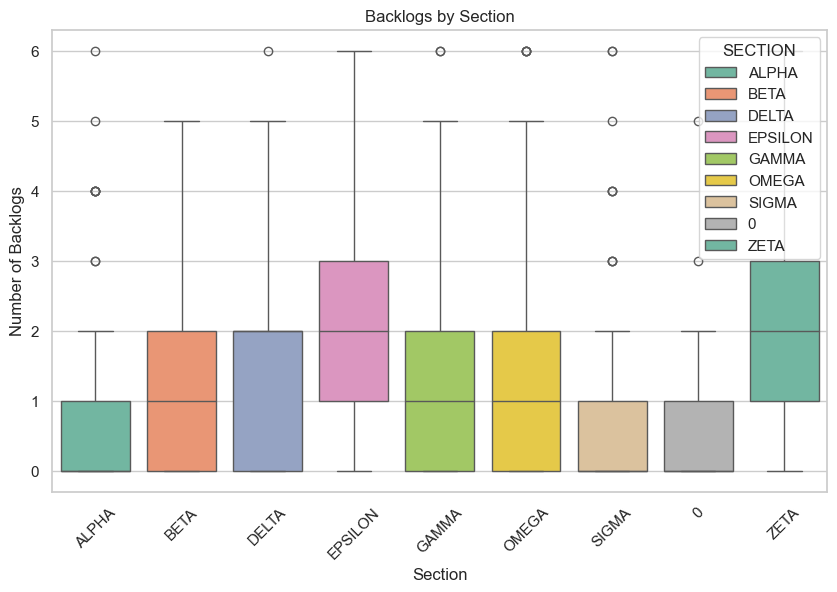

In [81]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="SECTION", y="Bc", data=df, palette="Set2",hue="SECTION")
plt.title("Backlogs by Section")
plt.xlabel("Section")
plt.ylabel("Number of Backlogs")
plt.xticks(rotation=45)
plt.show()

This code creates a box plot to visualize the distribution of backlogs (Bc) for each section 
in the DataFrame, with the help of Matplotlib and Seaborn libraries.

In [84]:
backlogs_per_subject = (df[subject_columns] < 10).sum().reset_index()
backlogs_per_subject.columns = ["Subject", "Backlogs"]
subject_with_max_backlogs = backlogs_per_subject.loc[backlogs_per_subject["Backlogs"].idxmax()]
print(f"\nSubject with the most backlogs:")
print(f"Subject: {subject_with_max_backlogs['Subject']}, Backlogs: {subject_with_max_backlogs['Backlogs']}")


Subject with the most backlogs:
Subject: M-II, Backlogs: 347


This code identifies the subject with the maximum number of backlogs (scores less than 10).

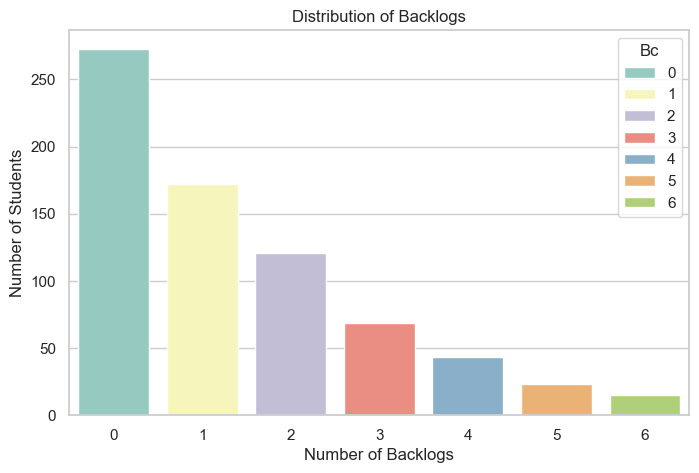

In [86]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Bc", data=df, palette="Set3", hue="Bc") 
plt.title("Distribution of Backlogs")
plt.xlabel("Number of Backlogs")
plt.ylabel("Number of Students")
plt.show()

This code creates a count plot to visualize the distribution of backlogs (Bc) among students, 
using Seaborn and Matplotlib.And to differentiate students with no backlogs, a few backlogs, 
and many backlogs.

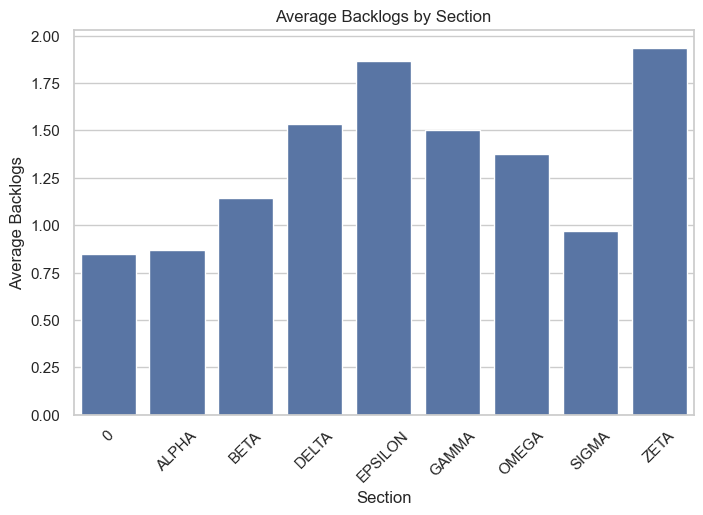

In [88]:
avg_backlogs = df.groupby("SECTION")["Bc"].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_backlogs.index, y=avg_backlogs.values)
plt.title("Average Backlogs by Section")
plt.xlabel("Section")
plt.ylabel("Average Backlogs")
plt.xticks(rotation=45)
plt.show()

This code calculates and visualizes the average number of backlogs (Bc) for each section using Seaborn 
and Matplotlib. Each bar represents a section.The height of the bar shows the mean number of backlogs
for students in that section.

In [90]:
df['PP'] = pd.to_numeric(df['PP'], errors='coerce')
def prog_skills(pp):
    if pp >= 18:
        return "Very Good"
    elif 12 <= pp <= 17:
        return "Good"
    else:
        return "Poor"    
df['Prog Skills'] = df['PP'].apply(prog_skills)
print(df)

     S.NO SECTION  DV  M-II  PP  BEEE  FL  FIMS  Total   Grade Result  \
0       1   ALPHA  12     0  17     9  19    15     72   Third   pass   
1       2   ALPHA  19    12  16    16  18     3     84  Second   pass   
2       3   ALPHA  18    14  18    18  18    16    102  Second   pass   
3       4   ALPHA  15     9  19    17  19    15     94  Second   pass   
4       5   ALPHA  18    17  19    19  20    18    111   First   pass   
..    ...     ...  ..   ...  ..   ...  ..   ...    ...     ...    ...   
711     0    ZETA  19     8   8    19  17    18     89  Second   pass   
712     0    ZETA  12     1   7    10  20     8     58    Pass   pass   
713     0    ZETA  17     6  14    14  17    18     86  Second   pass   
714     0    ZETA  12     1   6     7  15    12     53    Pass   pass   
715     0    ZETA  19    14  17    16  20    19    105  Second   pass   

     Percentage Performance  Bc Prog Skills  
0          60.0     Average   2        Good  
1          70.0        Good   1

A new column, Prog Skills, is added to the DataFrame with the calculated skill levels ("Very Good", "Good", or "Poor").

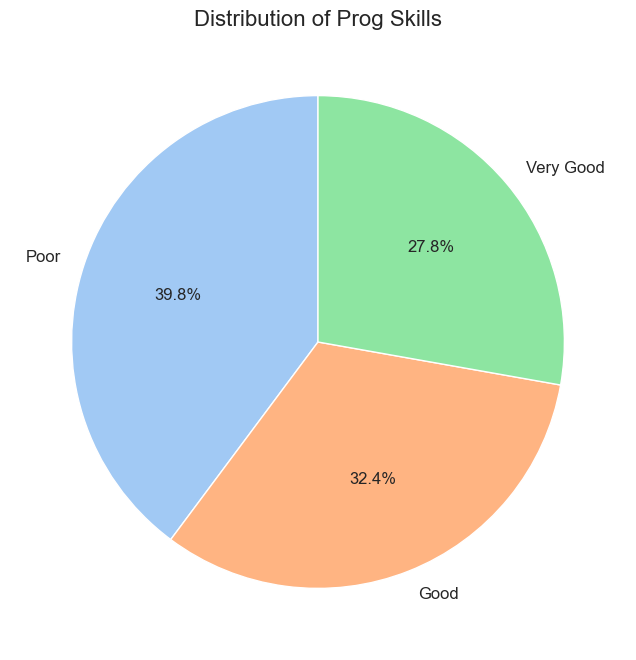

In [96]:
skill_counts = df['Prog Skills'].value_counts()
plt.figure(figsize=(8, 8))
sns.set_theme(style="whitegrid")
colors = sns.color_palette('pastel')[0:3]
plt.pie(skill_counts, labels=skill_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=colors, textprops={'fontsize': 12})
plt.title('Distribution of Prog Skills', fontsize=16)
plt.show()

The resulting pie chart will show the distribution of programming skills across the three categories 
("Very Good", "Good", "Poor"), with each slice representing the percentage.27.8 % students are very good at
programming skills, 39.8% students are poor at programming skills.

In [98]:
subjects = ['M-II', 'PP', 'BEEE', 'FL', 'FIMS']
subject_counts = {subject: (df[subject] == 20).sum() for subject in subjects}
highest_subject = max(subject_counts, key=subject_counts.get)
highest_count = subject_counts[highest_subject]
print("Count of students scoring 20 in each subject:")
for subject, count in subject_counts.items():
    print(f"{subject}: {count}")
print(f"\nSubject with the highest number of students scoring 20: {highest_subject} ({highest_count} students)")

Count of students scoring 20 in each subject:
M-II: 69
PP: 106
BEEE: 103
FL: 189
FIMS: 32

Subject with the highest number of students scoring 20: FL (189 students)


In [100]:
df['DV'] = pd.to_numeric(df['DV'], errors='coerce')
def analytical_skills(pp):
    if pp >= 18:
        return "Very Good"
    elif 12 <= pp <= 17:
        return "Good"
    else:
        return "Poor"  
df['Analytical Skills'] = df['DV'].apply(analytical_skills)
print(df)

     S.NO SECTION  DV  M-II  PP  BEEE  FL  FIMS  Total   Grade Result  \
0       1   ALPHA  12     0  17     9  19    15     72   Third   pass   
1       2   ALPHA  19    12  16    16  18     3     84  Second   pass   
2       3   ALPHA  18    14  18    18  18    16    102  Second   pass   
3       4   ALPHA  15     9  19    17  19    15     94  Second   pass   
4       5   ALPHA  18    17  19    19  20    18    111   First   pass   
..    ...     ...  ..   ...  ..   ...  ..   ...    ...     ...    ...   
711     0    ZETA  19     8   8    19  17    18     89  Second   pass   
712     0    ZETA  12     1   7    10  20     8     58    Pass   pass   
713     0    ZETA  17     6  14    14  17    18     86  Second   pass   
714     0    ZETA  12     1   6     7  15    12     53    Pass   pass   
715     0    ZETA  19    14  17    16  20    19    105  Second   pass   

     Percentage Performance  Bc Prog Skills Analytical Skills  
0          60.0     Average   2        Good              Go

A new column, Analytical Skills, is added to the DataFrame with the calculated skill levels ("Very Good", "Good", or "Poor").

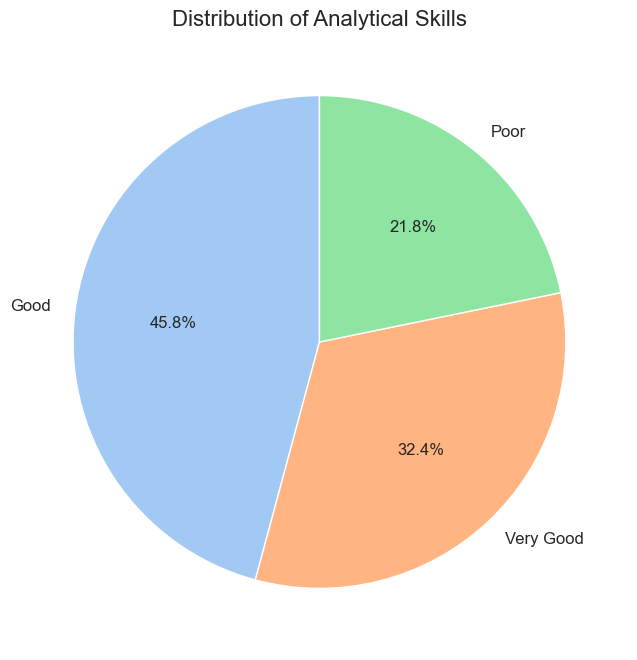

In [102]:
skill_counts = df['Analytical Skills'].value_counts()
plt.figure(figsize=(8, 8))
sns.set_theme(style="whitegrid")
colors = sns.color_palette('pastel')[0:3]
plt.pie(skill_counts, labels=skill_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=colors, textprops={'fontsize': 12})
plt.title('Distribution of Analytical Skills', fontsize=16)
plt.show()

The resulting pie chart will show the distribution of analytical skills across the three categories 
("Very Good", "Good", "Poor"), with each slice representing the percentage. 25% of students are very good at
analytical skills, half of the total students are in good level, and 25% of students are poor at analytical
skills.

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.NO               716 non-null    int32  
 1   SECTION            716 non-null    object 
 2   DV                 716 non-null    Int64  
 3   M-II               716 non-null    Int64  
 4   PP                 716 non-null    Int64  
 5   BEEE               716 non-null    Int64  
 6   FL                 716 non-null    Int64  
 7   FIMS               716 non-null    Int64  
 8   Total              716 non-null    Int64  
 9   Grade              716 non-null    object 
 10  Result             716 non-null    object 
 11  Percentage         716 non-null    Float64
 12  Performance        716 non-null    object 
 13  Bc                 716 non-null    int64  
 14  Prog Skills        716 non-null    object 
 15  Analytical Skills  716 non-null    object 
dtypes: Float64(1), Int64(7), i

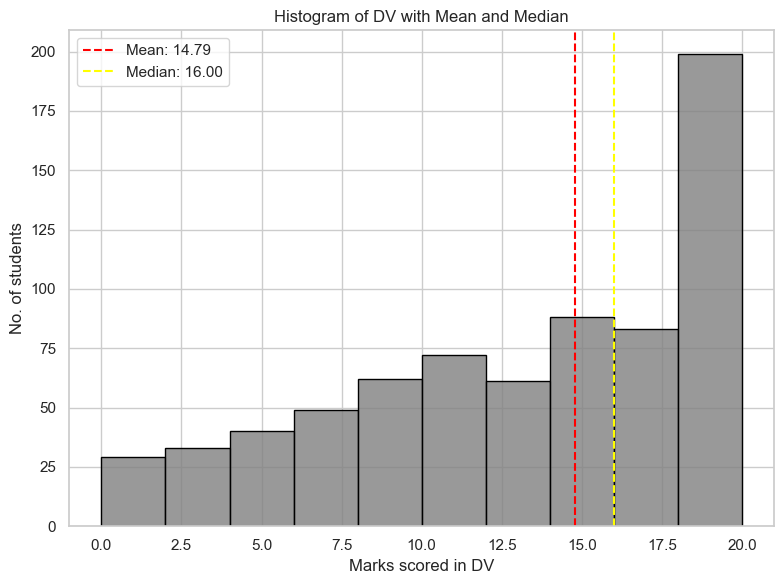

In [106]:
mean_PP = df['DV'].mean()
median_PP = df['DV'].median()
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='PP', bins=10, color='grey', edgecolor='black', alpha=0.8)
plt.axvline(mean_PP, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_PP:.2f}')
plt.axvline(median_PP, color='yellow', linestyle='dashed', linewidth=1.5, label=f'Median: {median_PP:.2f}')
plt.xlabel("Marks scored in DV")
plt.ylabel("No. of students")
plt.title("Histogram of DV with Mean and Median")
plt.legend()
plt.tight_layout()
plt.show()

The histogram of DV scores shows the distribution of student marks. The red (mean) and yellow (median) lines help identify central tendency. If the mean is greater than the median, the distribution is right-skewed, suggesting a few high scorers pulled the average up.

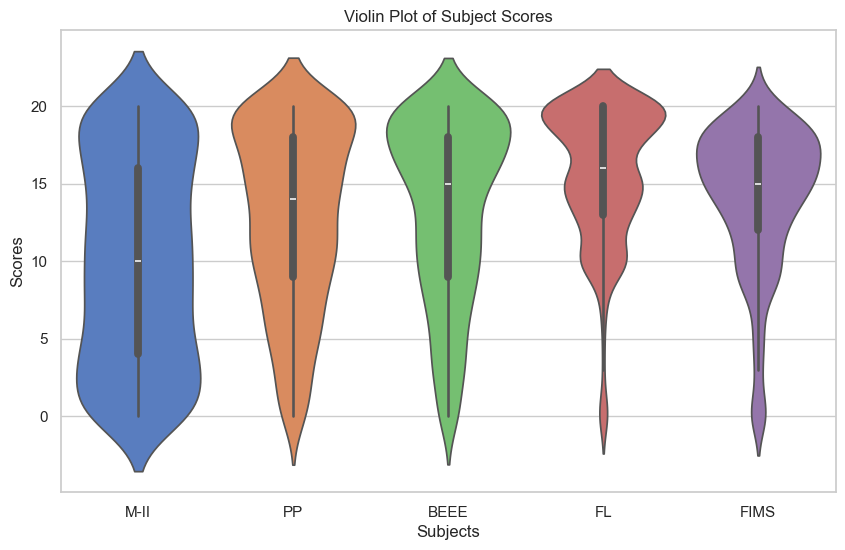

In [119]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df[subjects], palette="muted")
plt.title("Violin Plot of Subject Scores")
plt.xlabel("Subjects")
plt.ylabel("Scores")
plt.show()

The violin plot displays score distributions for each subject, highlighting density, spread, and median differences across subjects.

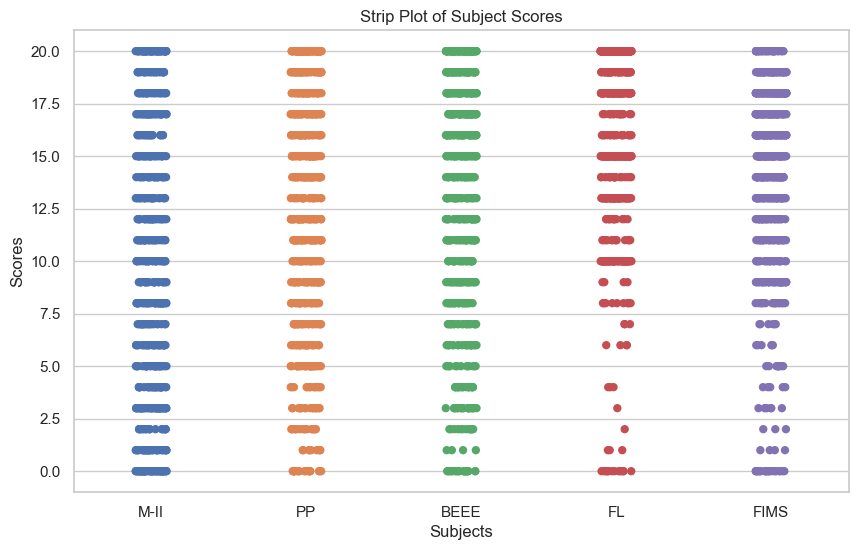

In [121]:
plt.figure(figsize=(10, 6))
sns.stripplot(data=df[subjects], palette="deep", size=6, jitter=True)
plt.title("Strip Plot of Subject Scores")
plt.xlabel("Subjects")
plt.ylabel("Scores")
plt.show()

The strip plot shows individual student scores per subject, revealing data concentration, spread, and potential outliers through point clustering and jitter.

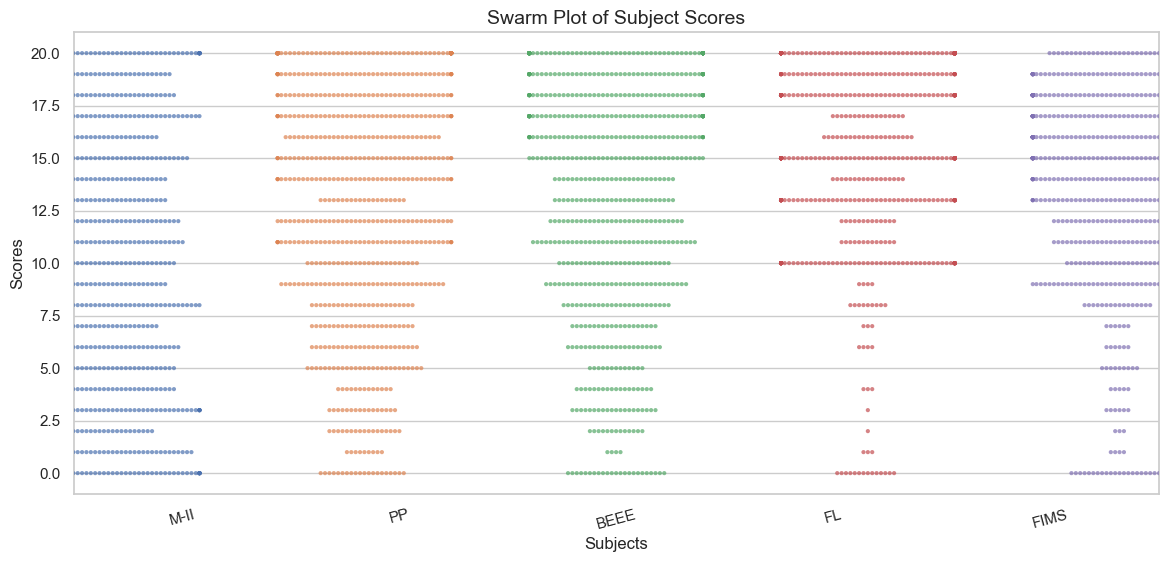

In [127]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(14, 6))  # Increase figure size
sns.swarmplot(data=df[subjects], palette="deep", size=3, dodge=True, alpha=0.7)
plt.title("Swarm Plot of Subject Scores", fontsize=14)
plt.xlabel("Subjects", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.xticks(rotation=15)  # Rotate labels for better visibility
plt.show()

The strip plot shows individual student scores per subject, revealing data concentration, spread, and potential outliers through point clustering and jitter.